In [70]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

sns.set()

In [71]:
X = pd.DataFrame(
    {
        "x": [4, 5, 10, 4, 3, 11, 14, 6, 10, 12],
        "y": [21, 19, 24, 17, 16, 25, 24, 22, 21, 21],
    }
)
X

,x,y
0,4,21
1,5,19
2,10,24
3,4,17
4,3,16
5,11,25
6,14,24
7,6,22
8,10,21
9,12,21


C:\Users\belsa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'KMeans model')

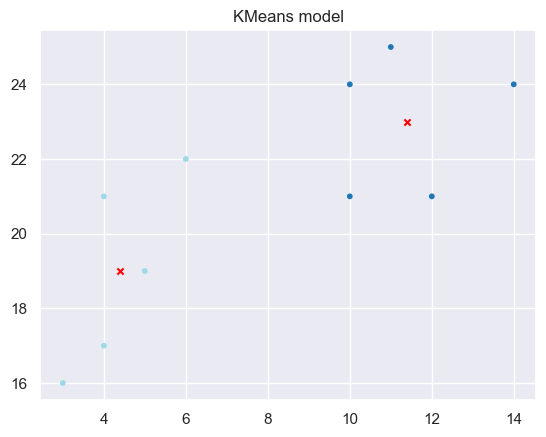

In [72]:
kmeans_model = KMeans(2, random_state=0)
labels = kmeans_model.fit(X).predict(X)
means = kmeans_model.cluster_centers_
plt.scatter(X['x'], X['y'], c=labels, s=10, cmap="tab20")
plt.scatter(means[:, 0], means[:, 1], c="red", s=20, marker='x')
plt.title("KMeans model")

In [73]:
sse = []
for k in range(1, len(X)+1):
    model = KMeans(k)
    model = model.fit(X)
    centers = model.cluster_centers_
    sse.append(sum([math.dist(i, centers[r]) for i, r in zip(X.values, model.predict(X))]))

C:\Users\belsa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\belsa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\belsa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\belsa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

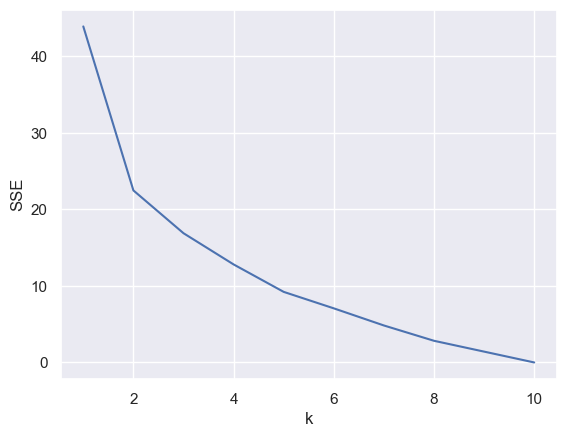

In [74]:
plt.plot(range(1, len(X)+1), sse)
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()